In [1]:
# import the usual libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# import skleand funtions needed for this project 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score

#Turn off warning 
import warnings
warnings.filterwarnings("ignore")

#import local libraries
import prepare
import acquire
import env


In [2]:
# Use function to acquire data
df = acquire.get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
df.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [5]:
# clean data with prep function
df = prepare.prep_telco(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [6]:
# get train, validate, test from prepare funtion
train, validate, test = prepare.split_telco_data(df)
train.shape, validate.shape, test.shape

((3937, 47), (1688, 47), (1407, 47))

In [8]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 1392 to 414
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  st

### What is the Churn rate?
### 26.57%

In [24]:
# Question #1
print(f'Churn percentage {round(train.churn_encoded.mean(),4)*100}%')

Churn percentage 26.57%


In [84]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.00000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.160782,32.552705,64.687033,2286.79892,0.494539,0.481077,0.294641,0.901956,0.591059,0.265685,...,0.383795,0.215646,0.391415,0.211582,0.234442,0.435611,0.215646,0.217424,0.328677,0.225552
std,0.367377,24.501417,30.033569,2266.17340,0.500034,0.499705,0.455939,0.297412,0.491701,0.441753,...,0.486371,0.411322,0.488129,0.408482,0.423704,0.495900,0.411322,0.412546,0.469792,0.417999
min,0.000000,1.000000,18.250000,18.80000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,36.050000,415.10000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.150000,1400.30000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.050000,3769.70000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.80000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
train.head().T

,1392,6445,4757,6599,3921
gender,Female,Male,Male,Female,Male
senior_citizen,0,0,0,0,0
partner,Yes,Yes,Yes,Yes,No
dependents,No,Yes,Yes,No,Yes
tenure,21,72,67,54,33
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,No
online_security,No,Yes,Yes,No,No internet service
online_backup,No,Yes,No,No,No internet service
device_protection,No,Yes,Yes,No,No internet service


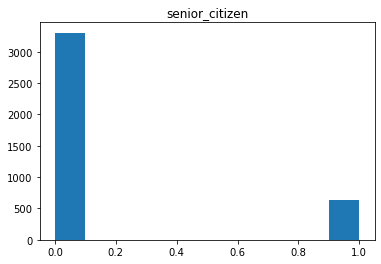

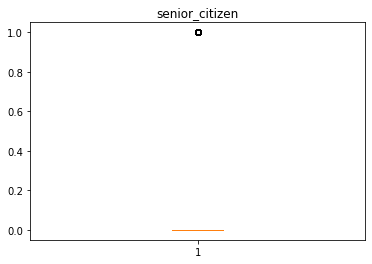

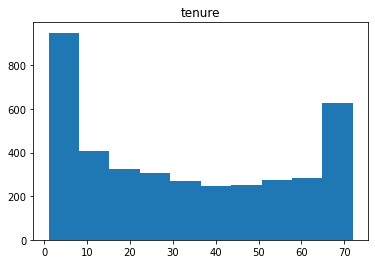

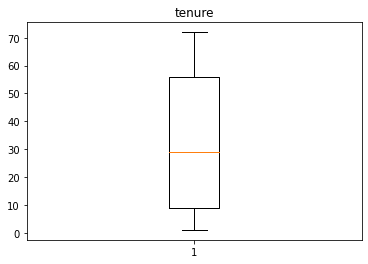

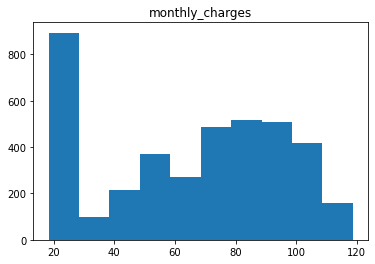

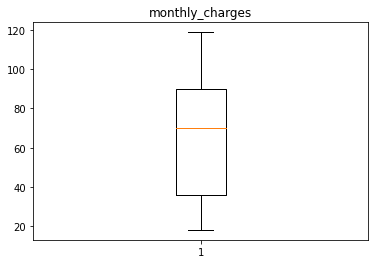

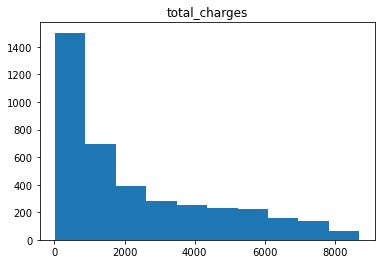

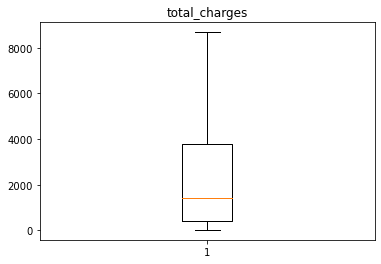

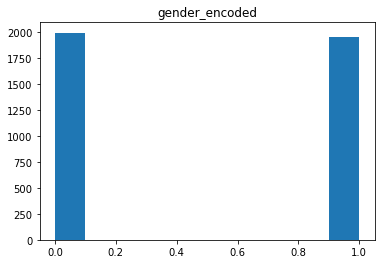

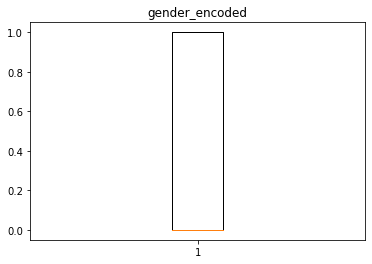

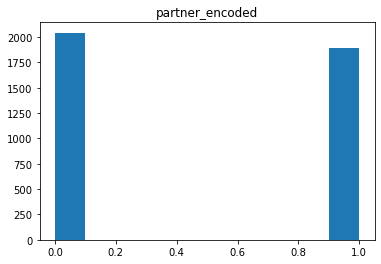

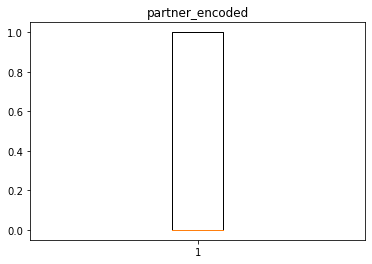

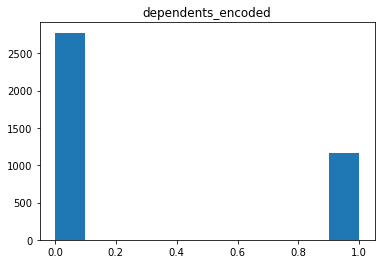

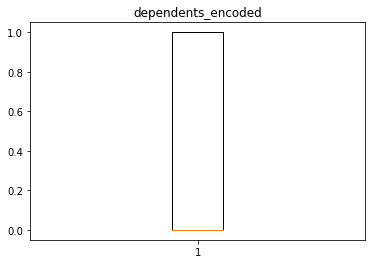

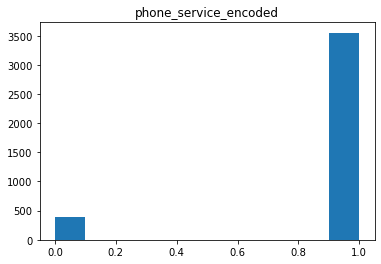

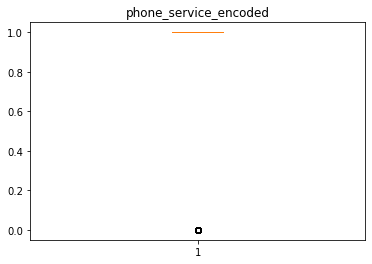

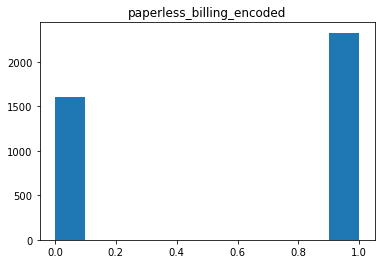

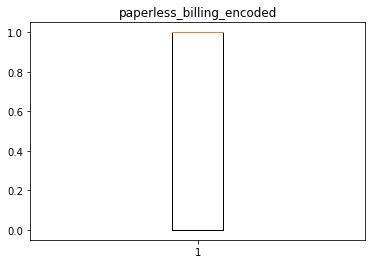

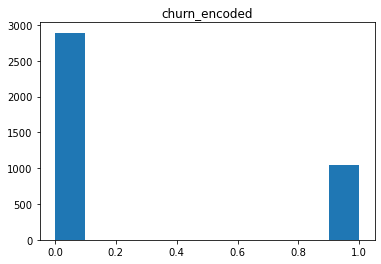

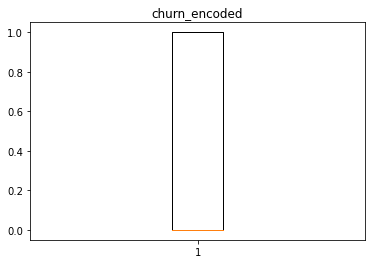

In [9]:
num_cols = train.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [87]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('--------------------------')
    print('\n')

GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents, dtype: int64
--------------------------


PHONE_SERVICE
Count:
Yes    6352
No      680
Name: phone_service, dtype: int64
--------------------------


MULTIPLE_LINES
Count:
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
--------------------------


ONLINE_SECURITY
Count:
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
--------------------------


ONLINE_BACKUP
Count:
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
--------------------------


DEVICE_PROTECTION
Count:
No                     3094
Yes                    2418
No internet 

Text(0.5, 1.0, 'Feautures Correlating with Churn')

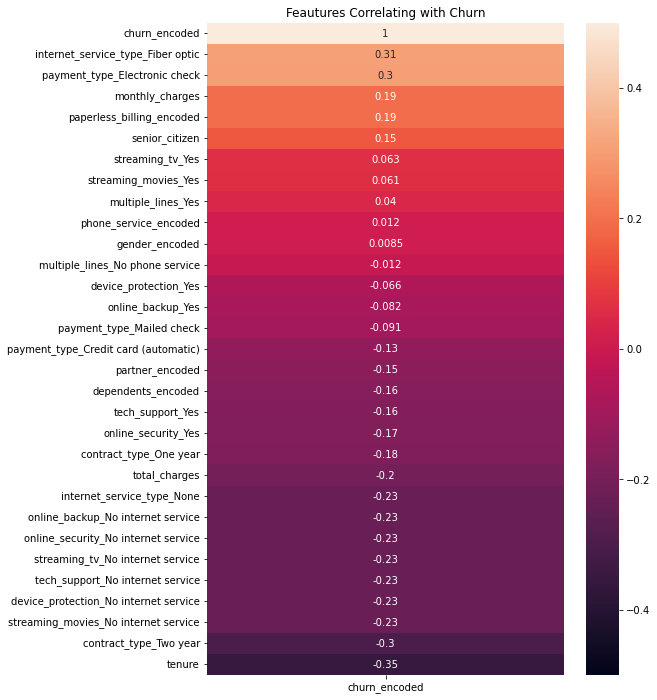

In [26]:
# Question #2 and Question #3
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn_encoded']].sort_values(by='churn_encoded', ascending=False), vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures Correlating with Churn')

### Top 3 churn drivers
1. Fiber Optic Internet Service
2. Payment by Electronic check
3. Monthly Charges

### Top 3 lowest churn 
1. Tenure
2. 2 year Contract
3. No internet Service(7)

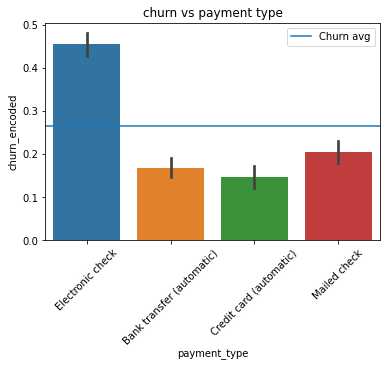

In [37]:
plt.title("churn vs payment type")
sns.barplot(x="payment_type", y="churn_encoded", data=train)
population_survival_rate = train.churn_encoded.mean()
plt.axhline(population_survival_rate, label="Churn avg")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

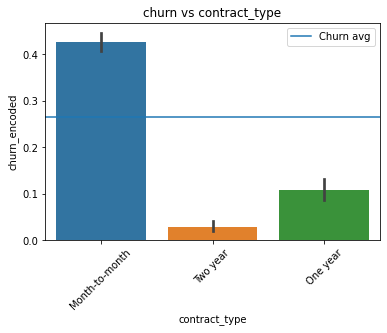

In [55]:
plt.title("churn vs contract_type")
sns.barplot(x="contract_type", y="churn_encoded", data=train)
population_survival_rate = train.churn_encoded.mean()
plt.axhline(population_survival_rate, label="Churn avg")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

It is not clear, we will have to separate them, let's try in $20 increments

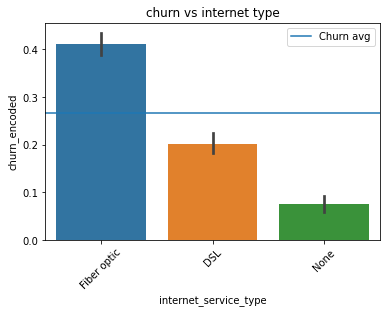

In [58]:
plt.title("churn vs internet type")
sns.barplot(x="internet_service_type", y="churn_encoded", data=train)
churn_rate = train.churn_encoded.mean()
plt.axhline(churn_rate, label="Churn avg")
plt.xticks(rotation = 45)
plt.legend()
plt.show()